## Geopandas

### Imports

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import geopandas
import geopandas.tools
from shapely.geometry import Point

### Load Crime Data

In [2]:
police_data = pd.read_csv('sf_police_incidents.csv')
police_data.sample(3)

,incident_num,category,longitude,latitude
1048,160896418.0,NON-CRIMINAL,-122.397591,37.717897
151,161059588.0,MISSING PERSON,-122.441394,37.771727
1040,160100924.0,NON-CRIMINAL,-122.397214,37.794564


In [3]:
police_data['geometry'] = police_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
print(type(police_data))
police_data.sample(3)

<class 'pandas.core.frame.DataFrame'>


,incident_num,category,longitude,latitude,geometry
485,160294828.0,ASSAULT,-122.413564,37.779514,POINT (-122.4135641 37.77951403)
813,170097305.0,BURGLARY,-122.395513,37.753618,POINT (-122.3955133 37.75361785)
4521,176098587.0,NON-CRIMINAL,-122.508485,37.753749,POINT (-122.5084847 37.75374888)


In [4]:
police_data = geopandas.GeoDataFrame(police_data, geometry='geometry')
police_data.crs = {'init': 'epsg:4326'}
print(type(police_data))
police_data.sample(3)

<class 'geopandas.geodataframe.GeoDataFrame'>


,incident_num,category,longitude,latitude,geometry
4721,166175076.0,LARCENY/THEFT,-122.405395,37.783510,POINT (-122.4053955 37.78351007)
1295,170241267.0,BURGLARY,-122.428285,37.739932,POINT (-122.4282851 37.73993170000001)
1035,170024063.0,OTHER OFFENSES,-122.418619,37.773053,POINT (-122.418619 37.77305255)


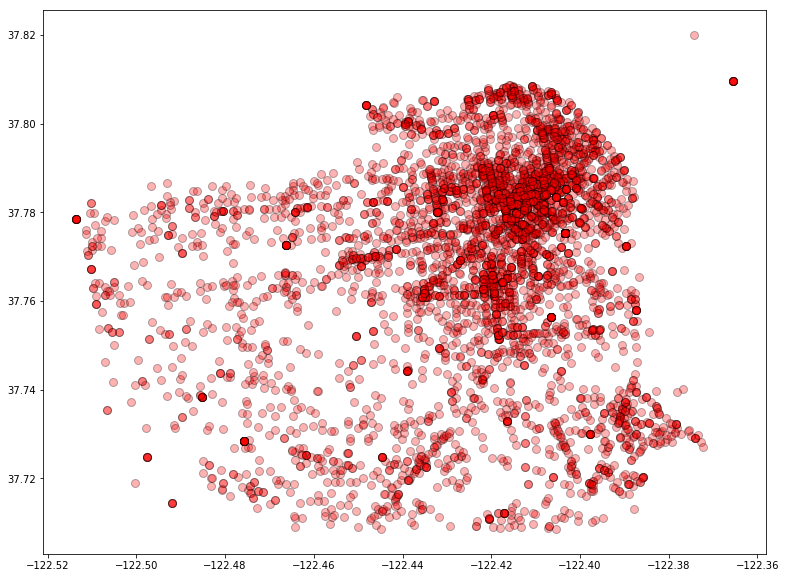

In [5]:
police_data.plot(figsize=(13,10), marker="o", mfc="red", markersize=8, markeredgecolor="black", alpha=0.3)
plt.show()

### Load geojson data of San Francisco

In [6]:
sf = geopandas.read_file('sf.geojson')
sf.crs = {'init': 'epsg:4326'}
sf.head()

,geometry,nhood
0,(POLYGON ((-122.3815777424142 37.7530704309124...,Bayview Hunters Point
1,(POLYGON ((-122.403612999828 37.74933700015653...,Bernal Heights
2,(POLYGON ((-122.4265550005568 37.7694849998470...,Castro/Upper Market
3,(POLYGON ((-122.4062259995664 37.7975590002937...,Chinatown
4,(POLYGON ((-122.4239820002333 37.7315519997551...,Excelsior


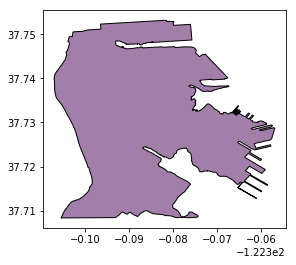

In [7]:
sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')
sf[0:1].plot()
plt.show()

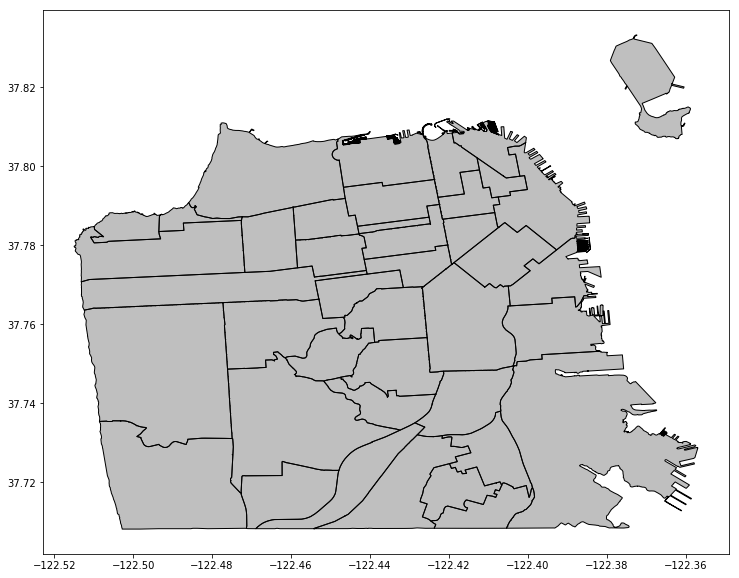

In [8]:
sf.plot(figsize=(13,10), color='gray')
plt.show()

In [9]:
police_data.sample(3)

,incident_num,category,longitude,latitude,geometry
4472,170328774.0,LARCENY/THEFT,-122.415619,37.807276,POINT (-122.4156188 37.8072756)
1357,160072044.0,MISSING PERSON,-122.431021,37.765102,POINT (-122.4310214 37.76510225)
558,160476264.0,LARCENY/THEFT,-122.421058,37.760068,POINT (-122.4210583 37.76006838)


### Overlay Crime Incident Data on GeoJSON Data

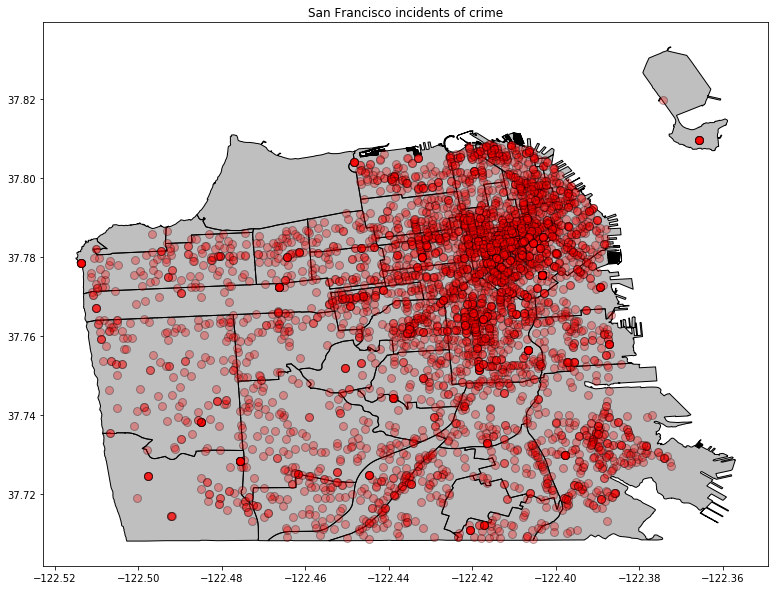

In [10]:
fig, ax = plt.subplots(1, figsize=(13,10))
sf_map = sf.plot(ax=ax, color='gray')
police_data.plot(ax=sf_map, marker="o", mfc="red", markersize=8, markeredgecolor="black", alpha=0.3)
ax.set_title("San Francisco incidents of crime")
plt.show()

### Conduct Spatial Join

In [11]:
combined = geopandas.tools.sjoin(police_data, sf, how='left')
combined.sample(5)

,incident_num,category,longitude,latitude,geometry,index_right,neighborhood_name
4837,160821255.0,ASSAULT,-122.493300,37.778710,POINT (-122.4933004 37.77870988),25,Outer Richmond
2040,170320140.0,OTHER OFFENSES,-122.506471,37.753835,POINT (-122.5064706 37.75383534),34,Sunset/Parkside
1986,170095456.0,VEHICLE THEFT,-122.415694,37.741609,POINT (-122.4156936 37.74160942),1,Bernal Heights
602,160373999.0,DRUG/NARCOTIC,-122.414744,37.778719,POINT (-122.4147438 37.77871926),35,Tenderloin
4110,170120304.0,NON-CRIMINAL,-122.403888,37.753095,POINT (-122.4038884 37.75309457),18,Mission
